In [ ]:
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
from heapq import heappush, heappop

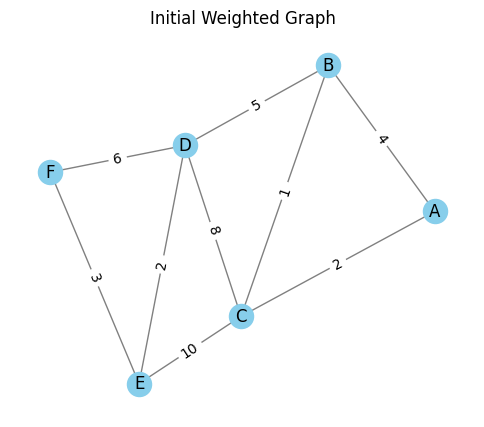

In [ ]:
G = nx.Graph()

edges = [
    ("A", "B", 4),
    ("A", "C", 2),
    ("B", "C", 1),
    ("B", "D", 5),
    ("C", "D", 8),
    ("C", "E", 10),
    ("D", "E", 2),
    ("D", "F", 6),
    ("E", "F", 3)
]

for u, v, w in edges:
    G.add_edge(u, v, weight=w)

pos = nx.spring_layout(G, seed=42)


plt.figure(figsize=(6, 5))
nx.draw_networkx(G, pos, with_labels=True, node_color="skyblue", edge_color="gray")

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Initial Weighted Graph")
plt.axis("off")
plt.show()


In [ ]:
def dijkstra_and_visualize(graph, start, layout):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start] = 0

    pq = []
    heappush(pq, (0, start))

    visited = set()

    step_count = 0

    while pq:
        current_dist, current_node = heappop(pq)

        if current_node in visited:
            continue

        visited.add(current_node)

        plt.figure(figsize=(6,5))

        color_map = []
        for n in graph.nodes():
            if n == current_node:
                color_map.append("red")
            elif n in visited:
                color_map.append("green")
            else:
                color_map.append("skyblue")

        node_labels = {}
        for n in graph.nodes():
            dist_label = distances[n]
            if dist_label == float('inf'):
                node_labels[n] = f"{n}\n∞"
            else:
                node_labels[n] = f"{n}\n{dist_label}"

        nx.draw_networkx(graph, layout,
                         with_labels=False,
                         node_color=color_map,
                         edge_color="gray")
        edge_labels = nx.get_edge_attributes(graph, 'weight')
        nx.draw_networkx_edge_labels(graph, layout, edge_labels=edge_labels)
        nx.draw_networkx_labels(graph, layout, labels=node_labels, font_color="black")

        plt.title(f"Dijkstra Step {step_count}: Settled {current_node} with dist={current_dist}")
        plt.axis("off")
        plt.show()

        step_count += 1

        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor]['weight']
            new_dist = current_dist + edge_weight
            if new_dist < distances[neighbor]:
                distances[neighbor] = new_dist
                heappush(pq, (new_dist, neighbor))

    return distances


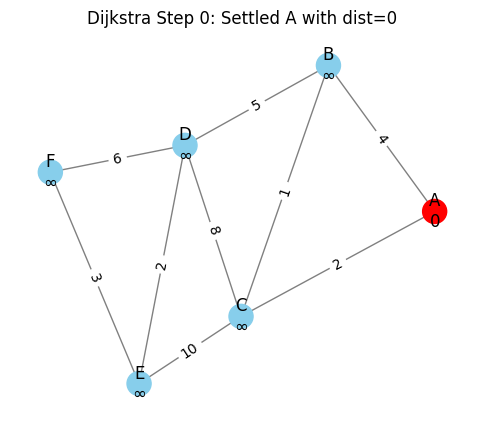

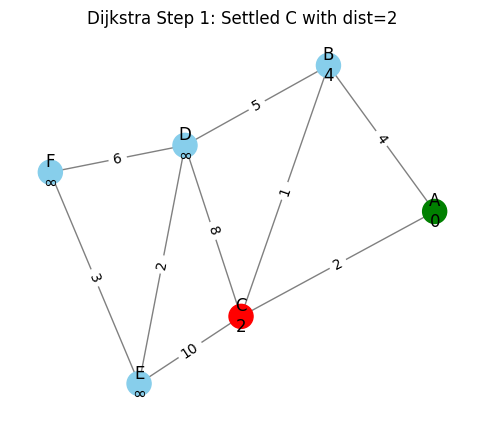

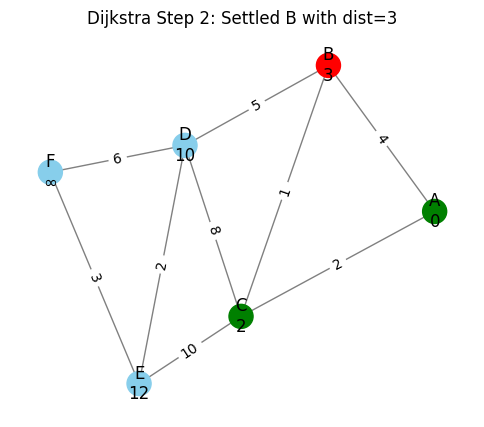

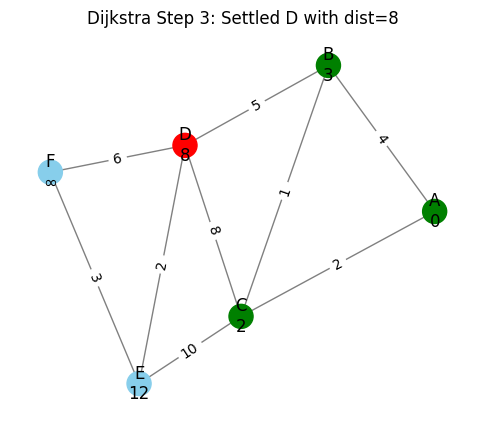

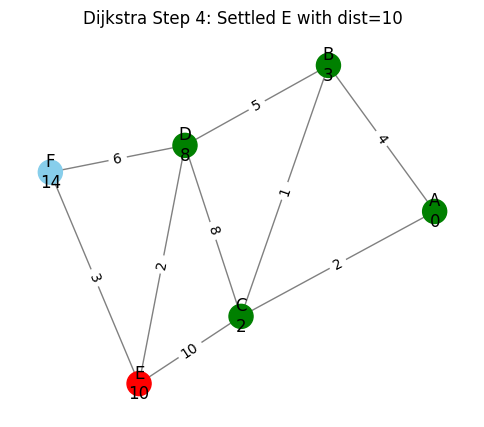

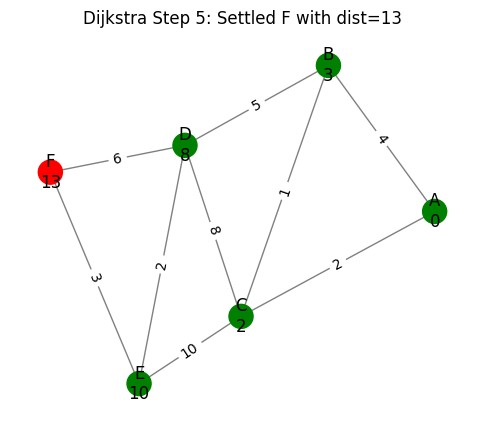

=== Final Distances from A ===
Node A: 0
Node B: 3
Node C: 2
Node D: 8
Node E: 10
Node F: 13


In [ ]:
final_distances = dijkstra_and_visualize(G, "A", pos)
print("=== Final Distances from A ===")
for node, dist in final_distances.items():
    print(f"Node {node}: {dist}")
